#### Importing important libraries 

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras import Sequential 
from keras.layers import Dense 
from keras.regularizers import L1,L2,L1L2 
from keras.optimizers import SGD  

#### importing the dataset 

In [2]:
df=pd.read_csv(r"D:\edu\INNO\Deep_Learning\Assignments\data\Multiple CSV\Multiple CSV\1.ushape.csv",header=None) 
df.head()

,0,1,2
0,0.031595,0.986988,0.0
1,2.115098,-0.046244,1.0
2,0.882490,-0.075756,0.0
3,-0.055144,-0.037332,1.0
4,0.829545,-0.539321,1.0


#### splitting input and output features 

In [3]:
x=df.iloc[:,0:2]
y=df.iloc[:,2].astype(int)

In [4]:
y.head()

0    0
1    1
2    0
3    1
4    1
Name: 2, dtype: int32

#### Splitting the data into train and test 

In [5]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.1)


#### Scaling the input features 

In [6]:
std=StandardScaler()
X_train=std.fit_transform(X_train)
X_test=std.transform(X_test)

#### Building the logical structure 

In [30]:
model=Sequential()
model.add(Dense(20,activation="relu",kernel_regularizer=L2(0.001),bias_regularizer=L2(0.001),input_dim=2))
model.add(Dense(18,activation="relu",kernel_regularizer=L2(0.001),bias_regularizer=L2(0.001)))
model.add(Dense(8,activation="relu",kernel_regularizer=L2(0.001),bias_regularizer=L2(0.001)))
model.add(Dense(8,activation="relu",kernel_regularizer=L2(0.001),bias_regularizer=L2(0.001)))
model.add(Dense(1,activation="sigmoid",kernel_regularizer=L2(0.001),bias_regularizer=L2(0.001)))    

In [31]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 20)                60        
                                                                 
 dense_17 (Dense)            (None, 18)                378       
                                                                 
 dense_18 (Dense)            (None, 8)                 152       
                                                                 
 dense_19 (Dense)            (None, 8)                 72        
                                                                 
 dense_20 (Dense)            (None, 1)                 9         
                                                                 
Total params: 671 (2.62 KB)
Trainable params: 671 (2.62 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


#### Compiling the model 

In [32]:
model.compile(loss="binary_crossentropy",optimizer=SGD(0.1),metrics=["accuracy"])
history=model.fit(X_train,y_train,batch_size=5,epochs=50,validation_split=0.1)

Epoch 1/50
17/17 [==============================] - 1s 25ms/step - loss: 0.7449 - accuracy: 0.4815 - val_loss: 0.7224 - val_accuracy: 0.6667
Epoch 2/50
17/17 [==============================] - 0s 6ms/step - loss: 0.6684 - accuracy: 0.7901 - val_loss: 0.7209 - val_accuracy: 0.5556
Epoch 3/50
17/17 [==============================] - 0s 7ms/step - loss: 0.5443 - accuracy: 0.8395 - val_loss: 0.6823 - val_accuracy: 0.6667
Epoch 4/50
17/17 [==============================] - 0s 6ms/step - loss: 0.4443 - accuracy: 0.8519 - val_loss: 0.6902 - val_accuracy: 0.7778
Epoch 5/50
17/17 [==============================] - 0s 6ms/step - loss: 0.4075 - accuracy: 0.8765 - val_loss: 0.6988 - val_accuracy: 0.7778
Epoch 6/50
17/17 [==============================] - 0s 7ms/step - loss: 0.3913 - accuracy: 0.8519 - val_loss: 0.7040 - val_accuracy: 0.7778
Epoch 7/50
17/17 [==============================] - 0s 6ms/step - loss: 0.3792 - accuracy: 0.8395 - val_loss: 0.7346 - val_accuracy: 0.6667
Epoch 8/50
17/17 [=

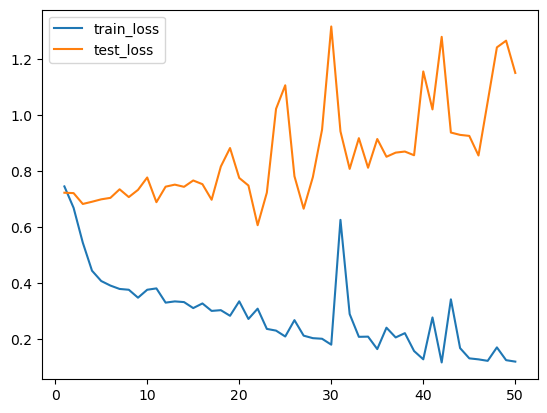

In [33]:
plt.plot(range(1,51),history.history["loss"],label="train_loss")
plt.plot(range(1,51),history.history["val_loss"],label="test_loss") 
plt.legend() 

#### making predictions using the model 

In [34]:
predicted=model.predict(X_test) 
predicted 

1/1 [==============================] - 0s 115ms/step


array([[1.3171181e-01],
       [9.9999601e-01],
       [9.3277663e-01],
       [8.4440142e-04],
       [8.6511439e-03],
       [9.4747555e-01],
       [6.3730115e-03],
       [9.9989772e-01],
       [9.9714947e-01],
       [9.9570519e-01]], dtype=float32)

In [35]:
predicted=np.where(predicted>0.5,1,0)
predicted 

array([[0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1]])

#### Evaluating the model 

0.9


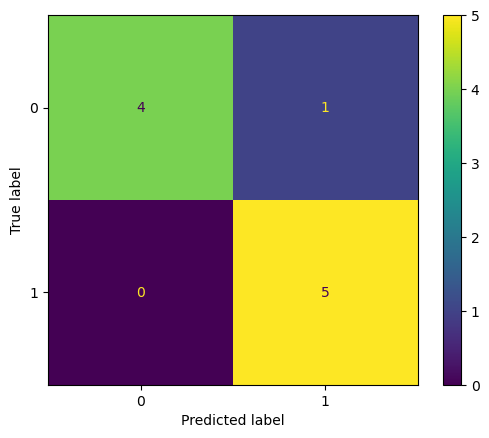

In [36]:
from sklearn.metrics import accuracy_score,confusion_matrix,ConfusionMatrixDisplay
print(accuracy_score(y_test,predicted))
cm=confusion_matrix(y_test,predicted)
va=ConfusionMatrixDisplay(cm)
va.plot() 
plt.show() 

#### Plotiing the decision surface 

In [37]:
from mlxtend.plotting  import plot_decision_regions


9600/9600 [==============================] - 21s 2ms/step


<Axes: >

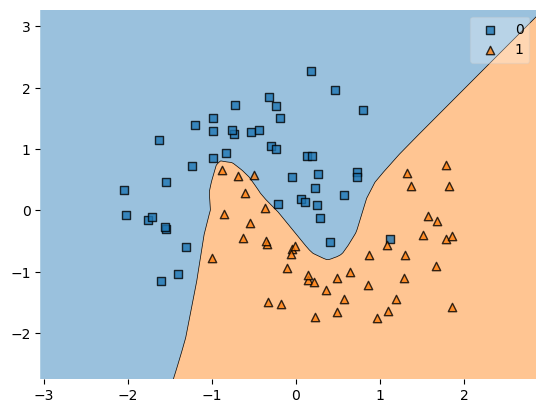

In [38]:
plot_decision_regions(X_train,y_train.values,clf=model)

9600/9600 [==============================] - 22s 2ms/step


<Axes: >

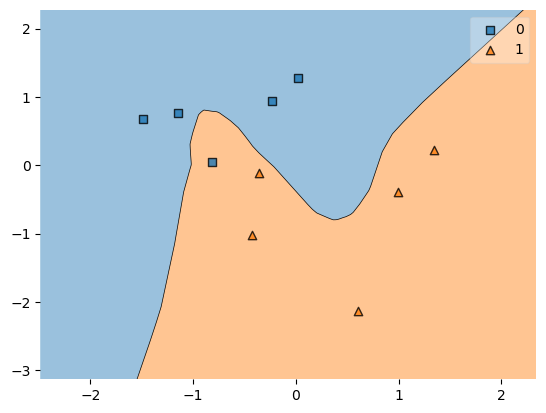

In [39]:
plot_decision_regions(X_test,y_test.values,clf=model)

#### Model summary 


- This neural network model is showing accuracy of 90 percent
- We have used 4 hidden layers.
- In the First Hidden layers we have used 20 neurons,activation function as relu and kernel and bias regularizer L2 as 0.001.
- In the second hidden layers we have used 18 neurons,activation function as relu and kernel and bias regularizer L2 as 0.001.
- In the third hidden layers we have used 8 neurons,activation function as relu and kernel and bias regularizer L2 as 0.001.
- In the fourth hidden layers we have used 8 neurons,activation function as relu and kernel and bias regularizer L2 as 0.001
- In the output layer we have used sigmoid as the activation function. 
- For compiling the model we haved loss as binary cross entropy,optimizer as SGD with batch size of 5 with learning rate of 0.01. 
- No of epochs used for training this model is 50. 